<a href="https://colab.research.google.com/github/eramirezcarlos/Font-Awesome-SVG-PNG/blob/master/Classification_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification in Python

# Dataset: Prostate Cancer

In [ ]:
import pandas as pd
dataset=pd.read_csv("CMTH642 Lab 9 prostate_cancer_dataset.csv")
dataset = dataset.drop('id', 1) # drop id column

dataset.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


The data set contains patients who have been diagnosed with either Malignant (M) or Benign (B) cancer.
The variable diagnosis_result is our target variable i.e. this variable will determine the results of the diagnosis based on the 8 numeric variables.
In case we wish to rename B as ”Benign” and M as “Malignant” and see the results in the percentage form, we may write:


In [ ]:
print(dataset['diagnosis_result'].value_counts())

M    62
B    38
Name: diagnosis_result, dtype: int64


# Data Normalization

Once we run this code, we are required to normalize the numeric features in the data set. Instead of normalizing each of the 8 individual variables we use:


In [ ]:
#Normalizing numeric data
def normalize(x):
  return ((x - min(x)) / (max(x) - min(x))) 

In [ ]:
X = list(set(list(dataset)) - set(['diagnosis_result']))
#dataset_x = dataset.drop('diagnosis_result', 1)
prc_n = dataset.iloc[:,].copy()
prc_n[X] = prc_n[X].apply(normalize)
prc_n

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,B,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,M,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,M,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,M,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364
...,...,...,...,...,...,...,...,...,...
95,M,0.8750,0.3125,0.666667,0.633652,0.287671,0.302932,0.443787,0.068182
96,B,0.8125,0.1875,0.216667,0.148568,0.479452,0.107492,0.325444,0.295455
97,B,0.6250,1.0000,0.083333,0.055489,0.438356,0.048860,0.000000,0.363636
98,B,0.7500,0.8125,0.183333,0.125895,0.273973,0.120521,0.159763,0.295455


Alternate way for normalizing the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

dataset_x = dataset.drop('diagnosis_result', 1)
prc_n = dataset_x.iloc[:,].copy()

scaler.fit(prc_n)
X = list(set(list(dataset)) - set(['diagnosis_result']))
prc_n = pd.DataFrame(scaler.transform(prc_n[X]), columns=X)
prc_n['diagnosis_result'] = dataset['diagnosis_result']

The first variable in our data set (after removal of id) is ‘diagnosis_result’ which is not numeric in nature. So, we start from 2nd variable. The function apply() applies normalize() to each feature in the data frame. 
Let’s check using the variable ‘radius’ whether the data has been normalized.

In [ ]:
prc_n.describe()

,smoothness,perimeter,texture,symmetry,fractal_dimension,compactness,radius,area
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,-3.449747,15.202470,-3.334407,-2.208955,-2.611138,-1.817990e-16,543.794895,86659.148353
std,0.003016,4.582241,0.220438,0.000097,0.559498,1.005038e+00,159.287587,39421.272496
min,-3.456489,6.535804,-3.641317,-2.209137,-3.413562,-1.457992e+00,287.516244,24899.204297
25%,-3.451648,12.438736,-3.513969,-2.209021,-3.001711,-7.594053e-01,385.457130,58776.669218
50%,-3.449898,14.664432,-3.365395,-2.208965,-2.727143,-1.347862e-01,548.691940,79399.075070
75%,-3.447838,18.583592,-3.163760,-2.208905,-2.315292,4.980515e-01,679.279788,113060.759959
max,-3.441452,29.760455,-2.962125,-2.208606,-0.393318,3.588272e+00,809.867635,231554.822884


# Creating training and test data set:


The kNN algorithm is applied to the training data set and the results are verified on the test data set.
For this, we would  divide the data set into 2 portions in the ratio of 65: 35 (assumed) for the training and test data set respectively.
We shall divide the prc_n data frame into prc_train and prc_test data frames

In [ ]:
prc_n['diagnosis_result']

0     M
1     B
2     M
3     M
4     M
     ..
95    M
96    B
97    B
98    B
99    M
Name: diagnosis_result, Length: 100, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
prc_train, prc_test, y_train, y_test = train_test_split(prc_n[X], prc_n['diagnosis_result'], test_size=0.35, random_state=42)

Our target variable is ‘diagnosis_result' which is now y_train for training data and y_test for test data.

# kNN Model

The knn needs to be used to train a model for which we need to import kNeighborsClassifier from sklearn.neighbors. The kNeighborsClassifier() function identifies the k-nearest neighbors using Euclidean distance where k is a user-specified number.
Now we are ready to use the function to classify test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(prc_train[X], y_train) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Prediction Results

In [ ]:
y_pred = classifier.predict(prc_test)  
y_pred

array(['M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B'], dtype=object)

Confusion matrix

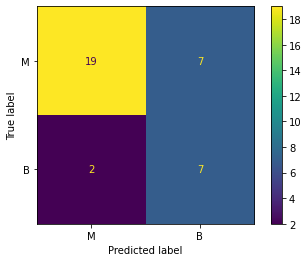

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, prc_test, y_test, labels=['M', 'B'])  

Prepared by Dr. Ceni Babaoglu.